In [10]:
import torch
from torch.utils.data import Dataset, TensorDataset
import numpy as np

In [11]:
m1m2_2 = torch.from_numpy(np.random.randn(2378, 2))
m1m2_1 = torch.from_numpy(np.random.randn(3472, 2))

In [12]:
ds_1 = TensorDataset(m1m2_1)

In [13]:
ds_2 = TensorDataset(m1m2_2)

In [94]:
class ConcatDataset(Dataset):
    def __init__(self, *datasets):
        self.datasets = datasets
        self.len = max(len(d) for d in self.datasets)
        super().__init__()
        
    def __getitem__(self, index):
        assert index < self.len
        return torch.cat([torch.stack(d[index % len(d)]) for d in self.datasets])
    
    def __len__(self):
        return self.len

In [95]:
d = ConcatDataset(ds_1, ds_2)

In [96]:
d[0]

tensor([[2.5195, 0.3756],
        [0.4008, 1.8526]], dtype=torch.float64)

In [97]:
length = 32

In [98]:
index % length


16

In [99]:
index = 16 

In [100]:
events = np.load('../datasets/sampleDict_FAR_1_in_1_yr.pickle', allow_pickle=True)

In [101]:
datasets = []
for n, event in events.items():
    m1 = torch.from_numpy(event['m1'])
    m2 = torch.from_numpy(event['m2'])
    z_prior = torch.from_numpy(event['z_prior'])
    x = torch.stack([m1, m2, z_prior], dim=-1)
    datasets.append(TensorDataset(x))

In [102]:
min(len(d) for d in datasets)

3194

In [103]:
max(len(d) for d in datasets)

268806

In [104]:
dataset = ConcatDataset(*datasets)

In [105]:
len(dataset)

268806

In [107]:
dataset[268805].shape

torch.Size([76, 3])

In [118]:
data = torch.stack([dataset[i] for i in range(2048)])

In [119]:
import seaborn as sns

<AxesSubplot:ylabel='Density'>

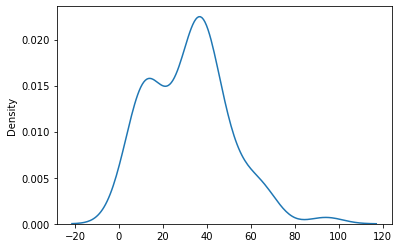

In [121]:
sns.kdeplot(data.mean(0)[:, 0])